# Retail Price Optimization - Data Preparation & EDA

## Step 1: Data Cleaning
- Loaded the dataset into Pandas.
- Removed duplicates.
- Handled missing values (dropped or filled depending on column type).
- Cleaned numeric columns (prices, discounts, ratings, counts) by removing symbols like ₹, %, and commas, and converted them to numeric datatypes.

### Key Cleaning Steps
- `discounted_price` → numeric (float)
- `actual_price` → numeric (float)
- `discount_percentage` → numeric (float)
- `rating` → numeric (float)
- `rating_count` → numeric (float)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("../data/amazon_sales.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (1465, 16)
Columns: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# Dataset overview
df.info()

# Summary stats
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [4]:
# Cell A: imports and helper functions
import re
import os
import math
import numpy as np
import pandas as pd
from IPython.display import display

def parse_price(x):
    """Parse price-like strings such as '₹1,234', 'Rs. 99', '999' -> float or NaN."""
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    # remove commas and common currency symbols / letters
    s = s.replace(',', '')
    # keep digits, dot and minus
    s = re.sub(r'[^0-9.\-]', '', s)
    # drop stray trailing dots
    s = re.sub(r'\.(?=.*\.)', '', s)  # remove all '.' except last (rare)
    try:
        return float(s) if s != '' else np.nan
    except:
        return np.nan

def parse_percentage(x):
    """Parse percent like '50%', '50 %', '50' -> float (0-100) or NaN"""
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    s = s.replace(',', '')
    s = s.replace('%', '')
    s = re.sub(r'[^0-9.\-]', '', s)
    try:
        return float(s) if s != '' else np.nan
    except:
        return np.nan

def parse_int(x):
    """Parse integer-like fields (rating_count etc.), removing commas and non-digits."""
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    s = re.sub(r'[^0-9\-]', '', s)
    try:
        return int(s) if s != '' else np.nan
    except:
        return np.nan

def parse_rating(x):
    """Parse rating like '4.1', '4.1 out of 5', etc. -> float"""
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == '':
        return np.nan
    # try to capture first float-like substring
    m = re.search(r'(\d+(\.\d+)?)', s)
    if m:
        try:
            return float(m.group(1))
        except:
            return np.nan
    return np.nan


In [5]:
# Cell B: load dataset
DATA_PATH = "../data/amazon_sales.csv"   # adjust if your path differs
df = pd.read_csv(DATA_PATH, low_memory=False)
print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
print("Columns:")
display(df.columns.tolist())
df.head(4)


Loaded: ../data/amazon_sales.csv
Shape: (1465, 16)
Columns:


['product_id',
 'product_name',
 'category',
 'discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


In [6]:
# Cell C: create numeric canonical columns
df = df.copy()  # work on a copy

# Create numeric price columns (keep originals)
df['actual_price_num'] = df['actual_price'].apply(parse_price) if 'actual_price' in df.columns else np.nan
df['discounted_price_num'] = df['discounted_price'].apply(parse_price) if 'discounted_price' in df.columns else np.nan

# discount percentage
if 'discount_percentage' in df.columns:
    df['discount_pct_num'] = df['discount_percentage'].apply(parse_percentage)
else:
    df['discount_pct_num'] = np.nan

# rating and rating_count
if 'rating' in df.columns:
    df['rating_num'] = df['rating'].apply(parse_rating)
else:
    df['rating_num'] = np.nan

if 'rating_count' in df.columns:
    df['rating_count_num'] = df['rating_count'].apply(parse_int)
else:
    df['rating_count_num'] = np.nan

# show conversion summary
conv_summary = {
    'actual_price_num_nonnull': df['actual_price_num'].notna().sum() if 'actual_price_num' in df.columns else 0,
    'discounted_price_num_nonnull': df['discounted_price_num'].notna().sum() if 'discounted_price_num' in df.columns else 0,
    'discount_pct_num_nonnull': df['discount_pct_num'].notna().sum(),
    'rating_num_nonnull': df['rating_num'].notna().sum(),
    'rating_count_num_nonnull': df['rating_count_num'].notna().sum()
}
print("Conversion counts:", conv_summary)

# show a few problematic rows (where price parsing failed)
print("\nRows where actual_price failed to parse (show original):")
display(df[df['actual_price_num'].isna()][['actual_price']].drop_duplicates().head(10))

print("\nRows where discounted_price failed to parse (show original):")
display(df[df['discounted_price_num'].isna()][['discounted_price']].drop_duplicates().head(10))

print("\nSample of rating strings that failed/parsed oddly:")
display(df[['rating','rating_num']].drop_duplicates().head(10))


Conversion counts: {'actual_price_num_nonnull': np.int64(1465), 'discounted_price_num_nonnull': np.int64(1465), 'discount_pct_num_nonnull': np.int64(1465), 'rating_num_nonnull': np.int64(1464), 'rating_count_num_nonnull': np.int64(1463)}

Rows where actual_price failed to parse (show original):


,actual_price



Rows where discounted_price failed to parse (show original):


,discounted_price



Sample of rating strings that failed/parsed oddly:


,rating,rating_num
0,4.2,4.2
1,4.0,4.0
2,3.9,3.9
6,4.1,4.1
7,4.3,4.3
12,4.4,4.4
20,4.5,4.5
21,3.7,3.7
45,3.3,3.3
48,3.6,3.6


In [7]:
# Cell D: trim whitespace for object columns & extract main category
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# Category: extract top-level before '|' if present (e.g., 'Electronics|...') 
if 'category' in df.columns:
    df['category_main'] = df['category'].apply(lambda s: s.split('|')[0] if isinstance(s, str) and '|' in s else s)
    # sometimes categories use '&' inside; keep as-is for now
    print("Top categories (sample):")
    display(df['category_main'].value_counts().head(15))

# Missing value counts
print("\nMissing value counts (important columns):")
display(df[['actual_price_num','discounted_price_num','discount_pct_num','rating_num','rating_count_num']].isnull().sum())


Top categories (sample):


category_main
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


Missing value counts (important columns):


actual_price_num        0
discounted_price_num    0
discount_pct_num        0
rating_num              1
rating_count_num        2
dtype: int64

In [8]:
# Cell E: compute discount from prices and compare to given discount_pct_num
if 'actual_price_num' in df.columns and 'discounted_price_num' in df.columns:
    # avoid division by zero
    mask = (df['actual_price_num'].notna()) & (df['actual_price_num'] != 0) & (df['discounted_price_num'].notna())
    df.loc[mask, 'discount_pct_calc'] = ((df.loc[mask, 'actual_price_num'] - df.loc[mask, 'discounted_price_num']) / df.loc[mask, 'actual_price_num']) * 100
    # absolute difference
    df['discount_pct_diff'] = (df['discount_pct_num'] - df['discount_pct_calc']).abs()
    # flag large mismatches
    mismatches = df[mask & (df['discount_pct_diff'] > 5)]  # >5 percentage points difference
    print("Number of rows with >5pp difference between given discount_pct and computed:", len(mismatches))
    display(mismatches[['product_id','actual_price','discounted_price','discount_percentage','discount_pct_calc','discount_pct_num','discount_pct_diff']].head(10))
else:
    print("actual_price or discounted_price column missing; skipping discount consistency check.")


Number of rows with >5pp difference between given discount_pct and computed: 0


,product_id,actual_price,discounted_price,discount_percentage,discount_pct_calc,discount_pct_num,discount_pct_diff


In [9]:
# Cell F: duplicates and non-positive checks
print("Total rows:", len(df))
print("Exact duplicate rows:", df.duplicated().sum())

# Unique products and counts
if 'product_id' in df.columns:
    print("Unique product_id count:", df['product_id'].nunique())
    top_products = df['product_id'].value_counts().head(10)
    print("Top products by review count:")
    display(top_products)

# Non-positive prices
if 'actual_price_num' in df.columns:
    print("\nRows with actual_price_num <= 0:", (df['actual_price_num'] <= 0).sum())
    display(df[df['actual_price_num'] <= 0][['product_id','actual_price']].head(10))

if 'discounted_price_num' in df.columns:
    print("\nRows with discounted_price_num <= 0:", (df['discounted_price_num'] <= 0).sum())
    display(df[df['discounted_price_num'] <= 0][['product_id','discounted_price']].head(10))


Total rows: 1465
Exact duplicate rows: 0
Unique product_id count: 1351
Top products by review count:


product_id
B08WRWPM22    3
B09YLXYP7Y    3
B08CF3D7QR    3
B09NHVCHS9    3
B085DTN6R2    3
B08DDRGWTJ    3
B09KLVMZ3B    3
B08CF3B7N1    3
B083342NKJ    3
B09C6HXFC1    3
Name: count, dtype: int64


Rows with actual_price_num <= 0: 0


,product_id,actual_price



Rows with discounted_price_num <= 0: 0


,product_id,discounted_price


In [10]:
# Cell G: derived features
# discount_amount
if 'actual_price_num' in df.columns and 'discounted_price_num' in df.columns:
    df['discount_amount'] = df['actual_price_num'] - df['discounted_price_num']

# popularity_score: combine rating and rating_count (proxy, not sales)
if 'rating_num' in df.columns and 'rating_count_num' in df.columns:
    df['popularity_score'] = np.log1p(df['rating_count_num'].fillna(0)) * df['rating_num'].fillna(df['rating_num'].median())

# show aggregates
cols_show = [c for c in ['actual_price_num','discounted_price_num','discount_pct_num','discount_amount','rating_num','rating_count_num','popularity_score'] if c in df.columns]
display(df[cols_show].describe().T)


,count,mean,std,min,25%,50%,75%,max
actual_price_num,1465.0,5444.990635,10874.826864,39.0,800.000000,1650.000000,4295.000000,139900.000000
discounted_price_num,1465.0,3125.310874,6944.304394,39.0,325.000000,799.000000,1999.000000,77990.000000
discount_pct_num,1465.0,47.691468,21.635905,0.0,32.000000,50.000000,63.000000,94.000000
discount_amount,1465.0,2319.679761,4604.473790,0.0,371.000000,800.000000,1953.000000,61910.000000
rating_num,1464.0,4.096585,0.291674,2.0,4.000000,4.100000,4.300000,5.000000
rating_count_num,1463.0,18295.541353,42753.864952,2.0,1186.000000,5179.000000,17336.500000,426973.000000
popularity_score,1465.0,34.105872,9.068357,0.0,28.464701,35.154374,40.456632,57.043705


In [11]:
# Cell H: save processed dataframe
OUT_DIR = "../data/processed"
os.makedirs(OUT_DIR, exist_ok=True)
OUT_PATH = os.path.join(OUT_DIR, "amazon_sales_processed.csv")

# choose columns to save (keep originals + parsed numeric versions)
cols_keep = list(df.columns)  # save all for traceability; if you want smaller, pick a subset
df.to_csv(OUT_PATH, index=False)
print("Saved processed CSV to:", OUT_PATH)


Saved processed CSV to: ../data/processed\amazon_sales_processed.csv


## Step 2: Univariate Analysis

We start by analyzing individual variables to understand their distribution.

- Numerical variables → discounted_price, actual_price, discount_percentage, rating, rating_count
- Categorical variables → category, product_name (we’ll check top ones)


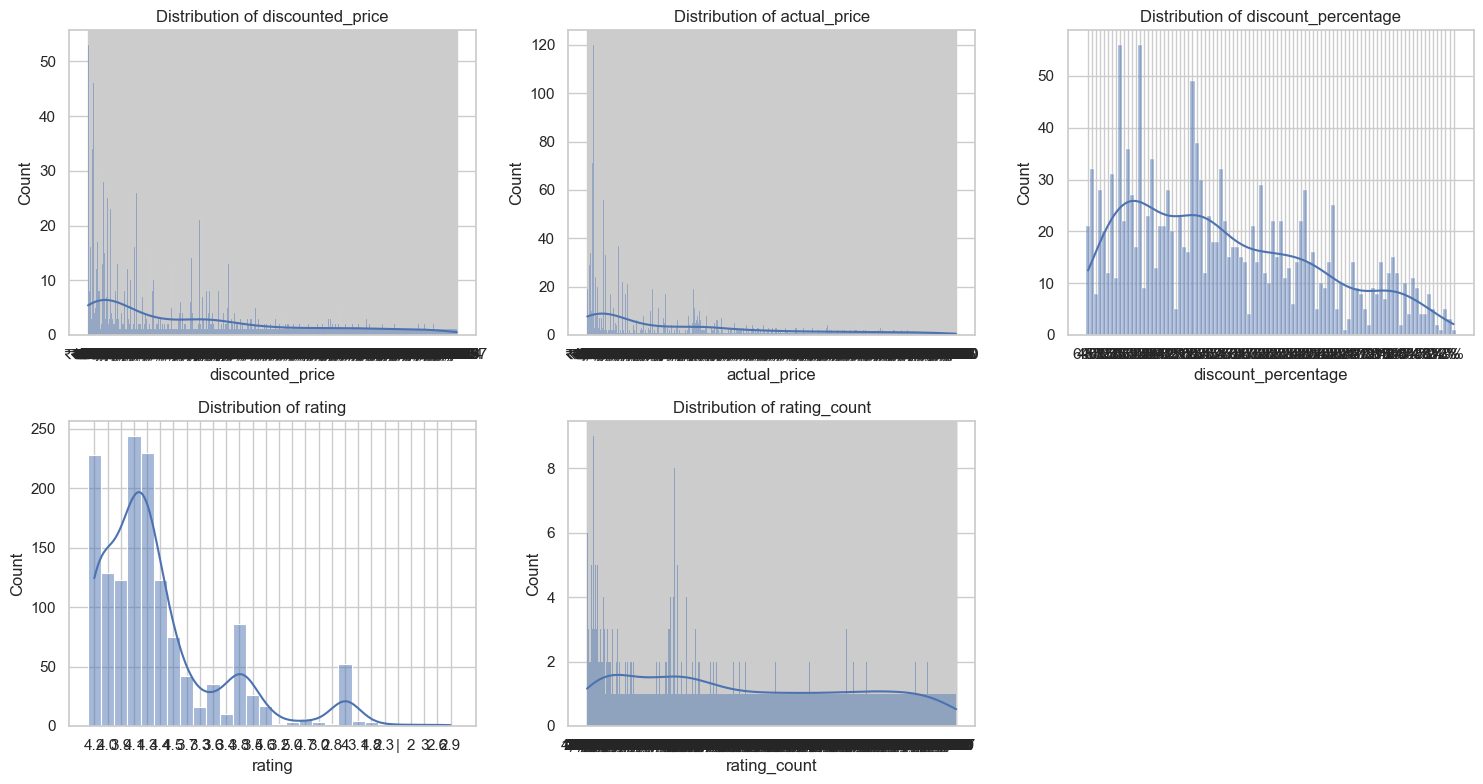

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


### 2.1 Numerical Variables - Distribution

- **Discounted Price** → Right-skewed (most products under ₹2000).
- **Actual Price** → More spread, with a long tail (expensive products exist but are rare).
- **Discount Percentage** → Peaks at common discounts (like 40–60%).
- **Ratings** → Most products are rated 3.5–4.5 stars.
- **Rating Count** → Highly skewed (few products have massive review counts).


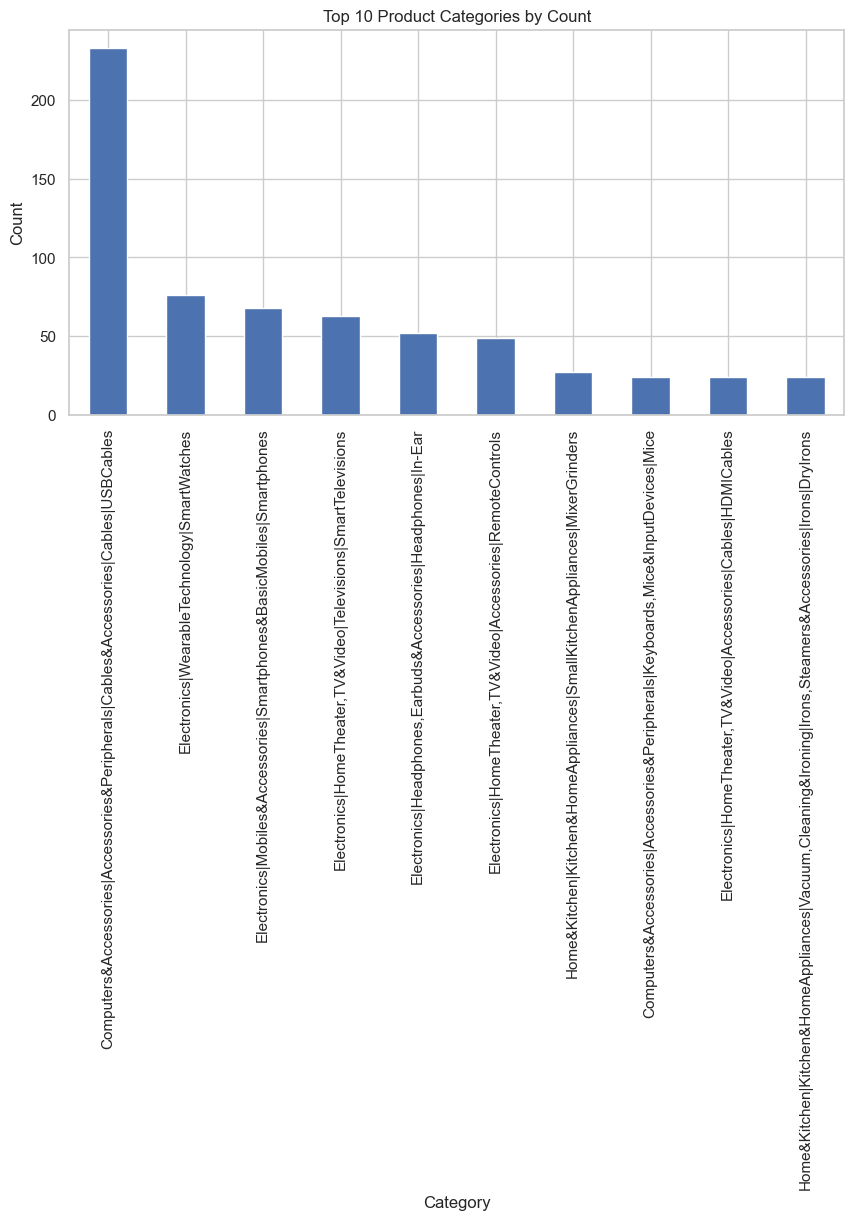

In [13]:
plt.figure(figsize=(10,5))
df['category'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Product Categories by Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


### 2.2 Categorical Variables - Categories

- Some categories dominate the dataset.
- Top 3 categories represent a large portion of products.
- Helps us know which segments Amazon pushes most in sales.


### Top 10 Most Reviewed Products

We analyze which products have received the highest number of reviews.  
This helps identify **popular products** that attract customer attention.

Steps:
1. Convert `rating_count` to numeric (some values may be stored as text).
2. Group by `product_name` and sum the review counts.
3. Select the top 10 products with the highest review counts.
4. Plot the results in a bar chart.


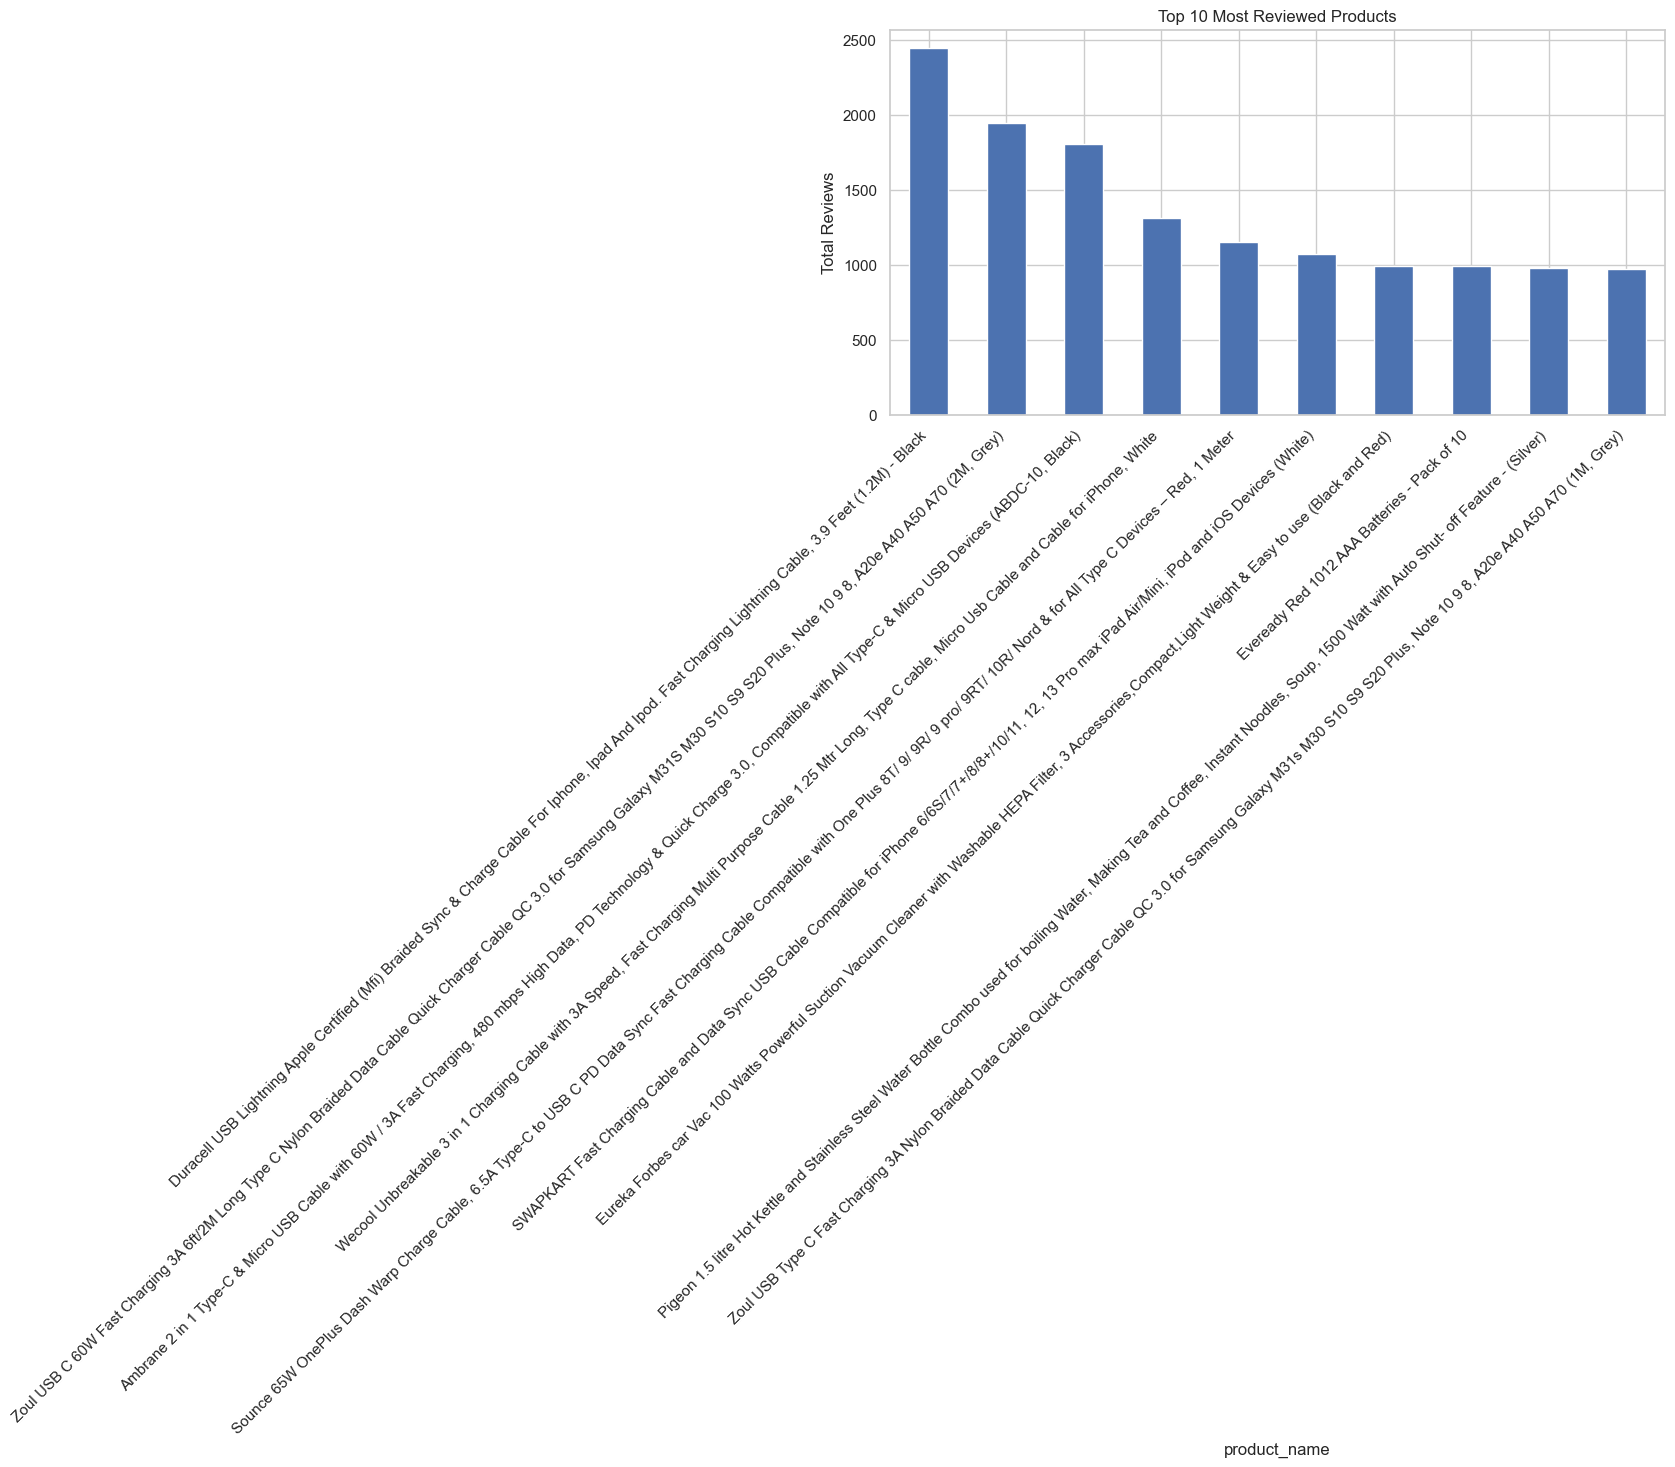

In [15]:
# Ensure rating_count is numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

plt.figure(figsize=(10,5))
df.groupby('product_name')['rating_count'].sum().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Reviewed Products")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45, ha='right')
plt.show()
